In [1]:
%%capture
!pip install qldpc

In [2]:
import networkx as nx
import numpy as np
import qldpc
from qldpc import codes

np.set_printoptions(linewidth=200)

# Classical linear codes

In [3]:
# ring code: repetition code with periodic boundary conditions
ring_code = codes.RingCode(5)
print(ring_code)
print()
print(ring_code.get_code_params())

RingCode on 5 bits, with parity check matrix
[[1 1 0 0 0]
 [0 1 1 0 0]
 [0 0 1 1 0]
 [0 0 0 1 1]
 [1 0 0 0 1]]

(5, 1, 5)


In [4]:
# Hamming code: columns of parity check matrix = nonzero code words
hamming_code = codes.HammingCode(3)
print(hamming_code)
print()
print(hamming_code.get_code_params())

HammingCode on 7 bits, with parity check matrix
[[0 0 0 1 1 1 1]
 [0 1 1 0 0 1 1]
 [1 0 1 0 1 0 1]]

(7, 4, 3)


In [5]:
# random classical code on 5 bits with 3 checks
code = codes.ClassicalCode.random(5, 3, seed=0)
print(code)
print()
print(code.get_code_params())

ClassicalCode on 5 bits, with parity check matrix
[[1 0 0 0 1]
 [0 0 1 1 0]
 [1 1 0 1 1]]

(5, 2, 2)


In [6]:
# random code over trinary field
code = codes.ClassicalCode.random(5, 3, field=3, seed=1)
print(code)
print()
print(code.get_code_params())

ClassicalCode on 5 symbols over GF(3), with parity check matrix
[[0 2 1 1 0]
 [0 0 2 2 2]
 [1 1 1 0 1]]

(5, 2, 3)


# Quantum codes: basics

In [7]:
# smallest quantum error-correcting code
five_qubit_code = codes.FiveQubitCode()
print(five_qubit_code)
print()
print(five_qubit_code.get_stabilizers())

FiveQubitCode on 5 qubits, with parity check matrix
[[0 1 1 0 0 1 0 0 1 0]
 [0 0 1 1 0 0 1 0 0 1]
 [0 0 0 1 1 1 0 1 0 0]
 [1 0 0 0 1 0 1 0 1 0]]

['X Z Z X I', 'I X Z Z X', 'X I X Z Z', 'Z X I X Z']


In [8]:
# surface code as a hypergraph product code
rep_code = codes.RepetitionCode(3)
surface_code = codes.HGPCode(rep_code, rep_code)
print(surface_code)
print()
print(surface_code.get_code_params())

HGPCode on 13 qubits
X-type parity checks:
[[1 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 1]]
Z-type parity checks:
[[1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 1]]

(13, 1, 3)


In [9]:
# logical X and Z operators
# each operator is a bitstring of length 2*num_qubits, indicating the support of single-qubit X and Z operators
ops_x, ops_z = surface_code.get_logical_ops()
print("logical X-type ops:", ops_x)
print("logical Z-type ops:", ops_z)

logical X-type ops: [[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
logical Z-type ops: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]]


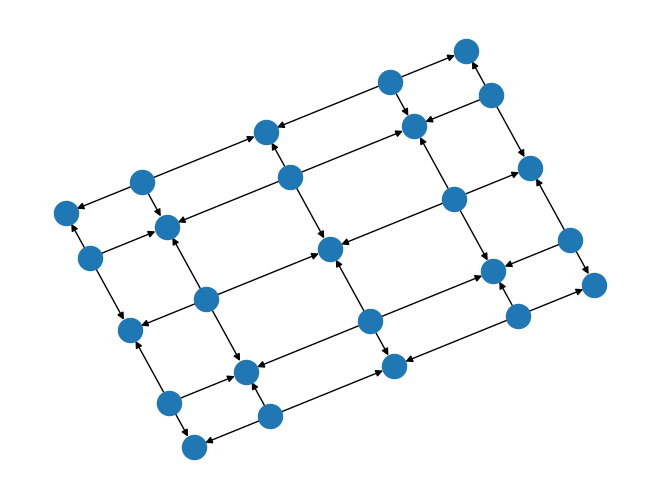

In [10]:
# surface code Tanner graph -- also the qubit layout!
# the Tanner garph is a directed bipartite graph, with edges oriented from check qubits to data qubits
nx.draw_spectral(surface_code.graph)

In [11]:
# toric code as a hypergraph product code
ring_code = codes.RingCode(3)
toric_code = codes.HGPCode(ring_code, ring_code)
print(toric_code)
print()
print(toric_code.get_code_params())

# there are now two logical Pauli-X and Pauli-Z operators!
ops_x, ops_z = toric_code.get_logical_ops()
assert len(ops_x) == len(ops_z) == toric_code.dimension == 2

HGPCode on 18 qubits
X-type parity checks:
[[1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1]]
Z-type parity checks:
[[1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1]]

(18, 2, 3)


In [12]:
# compute code distance exactly (with exponential runtime)
print("exact distance:", toric_code.get_distance())

# compute an upper bound to the code distance with 100 Monte Carlo trials
print("upper bound: <=", toric_code.get_distance(bound=100))

exact distance: 3
upper bound: <= 3
